# SARIMA Model

In [1]:
# Seasonal Auto Regression Moving Average
# ARIMA only for trend, SARIMA for both trend and seasonality

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = [16,8]
# adjusts the size of all plots in notebook

In [4]:
# read footfalldaily csv file from folder
df = pd.read_csv('footfalldaily.csv', header=0, parse_dates=[0])

In [5]:
df.head()

,Date,TotalCount
0,2009-03-30,18659
1,2009-03-31,26938
2,2009-01-04,21882
3,2009-02-04,37675
4,2009-03-04,21134


In [6]:
df.dtypes

Date          datetime64[ns]
TotalCount             int64
dtype: object

In [7]:
df2 = df.copy()

In [8]:
df2.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

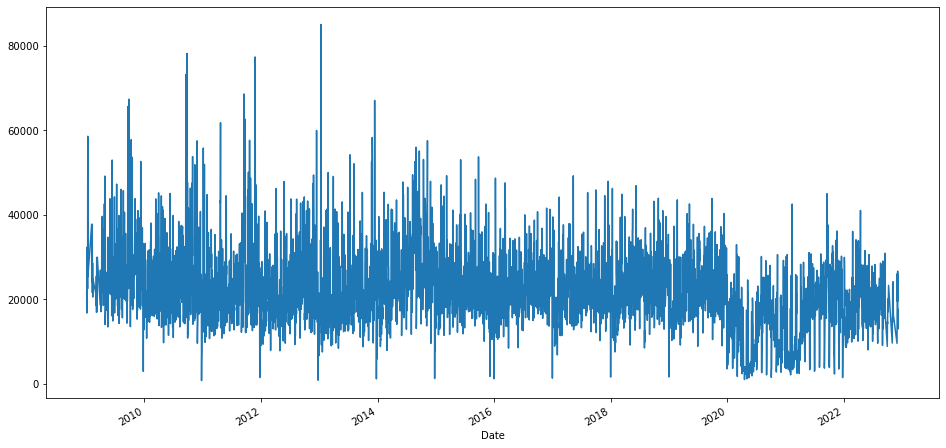

In [9]:
df2['TotalCount'].plot()

In [10]:
df2.reset_index(inplace=True)

In [11]:
df2.head()

,Date,TotalCount
0,2009-03-30,18659
1,2009-03-31,26938
2,2009-01-04,21882
3,2009-02-04,37675
4,2009-03-04,21134


<AxesSubplot:ylabel='TotalCount'>

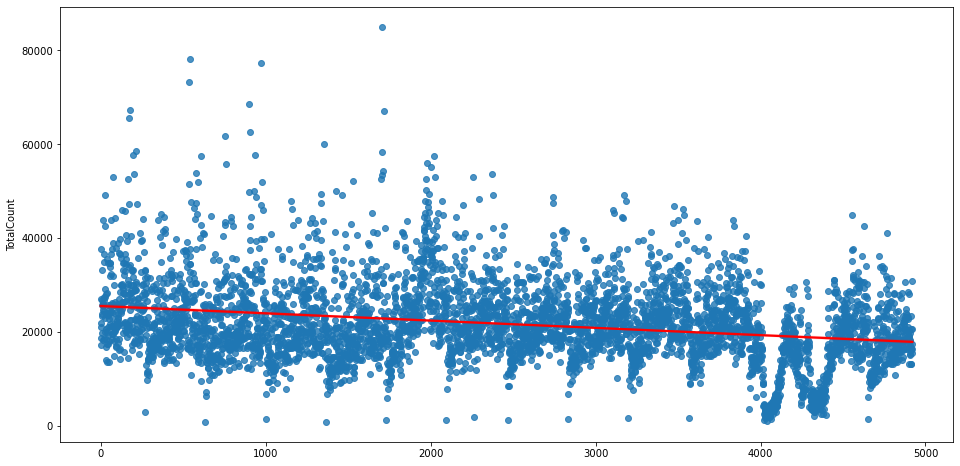

In [12]:
sns.regplot(x= df2.index, y=df2['TotalCount'], line_kws={"color": "red"})

<AxesSubplot:ylabel='TotalCount'>

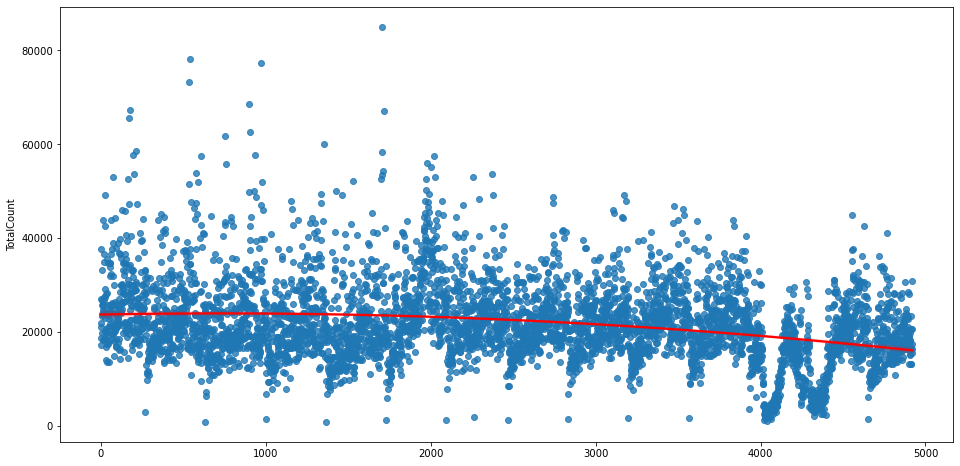

In [13]:
sns.regplot(x= df2.index, y=df2['TotalCount'], order=2, line_kws={"color": "red"})

In [14]:
# p = trend autoregression order
# d = trend difference order
# q = trend moving average order

# Seasonal elements
# P = seasonal autoregessive order
# D = seasonal differencing order
# Q = seasonal moving average order
# m = number of time steps for a single seasonal period

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
df3 = df2.copy()

In [17]:
df3.head()

,Date,TotalCount
0,2009-03-30,18659
1,2009-03-31,26938
2,2009-01-04,21882
3,2009-02-04,37675
4,2009-03-04,21134


In [18]:
df3.tail()

,Date,TotalCount
4916,2022-09-14,17440
4917,2022-09-15,15555
4918,2022-09-16,20695
4919,2022-09-17,30937
4920,2022-09-18,16290


In [19]:
df3.index.dtype

dtype('int64')

In [20]:
df3.index = pd.to_datetime(df3.index)

In [21]:
df3.index.dtype

dtype('<M8[ns]')

In [23]:
# prophet model
from prophet import Prophet

In [31]:
m = Prophet()

In [32]:
df.head()

,Date,TotalCount
0,2009-03-30,18659
1,2009-03-31,26938
2,2009-01-04,21882
3,2009-02-04,37675
4,2009-03-04,21134


In [35]:
df.columns = ['ds', 'y']

In [36]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [37]:
df['ds'] = pd.to_datetime(df['ds'])

In [38]:
df['ds'].dtype 

dtype('<M8[ns]')

In [39]:
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future_hits = m.make_future_dataframe(periods=365)

In [41]:
forecast = m.predict(future_hits)

In [42]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-01-04,26340.062526,13166.930016,32736.657264,26340.062526,26340.062526,-3733.858282,-3733.858282,-3733.858282,-2528.772789,-2528.772789,-2528.772789,-1205.085493,-1205.085493,-1205.085493,0.0,0.0,0.0,22606.204244
1,2009-01-05,26336.205805,13719.380991,32855.859076,26336.205805,26336.205805,-2436.962362,-2436.962362,-2436.962362,-1021.133250,-1021.133250,-1021.133250,-1415.829112,-1415.829112,-1415.829112,0.0,0.0,0.0,23899.243443
2,2009-01-06,26332.349084,14297.151408,33473.954118,26332.349084,26332.349084,-2640.944708,-2640.944708,-2640.944708,-993.065724,-993.065724,-993.065724,-1647.878985,-1647.878985,-1647.878985,0.0,0.0,0.0,23691.404375
3,2009-01-07,26328.492363,13631.412326,33091.645690,26328.492363,26328.492363,-2690.441534,-2690.441534,-2690.441534,-789.723761,-789.723761,-789.723761,-1900.717772,-1900.717772,-1900.717772,0.0,0.0,0.0,23638.050829
4,2009-01-08,26324.635642,14316.660697,32989.000470,26324.635642,26324.635642,-2972.183740,-2972.183740,-2972.183740,-799.097778,-799.097778,-799.097778,-2173.085962,-2173.085962,-2173.085962,0.0,0.0,0.0,23352.451902


In [43]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5281,2023-12-05,18073.700558,8232.113429,27399.592805
5282,2023-12-06,18318.470909,8812.880051,28064.972963
5283,2023-12-07,18326.921648,8957.235687,28628.879937
5284,2023-12-08,19687.510594,10784.627337,28967.469226
5285,2023-12-09,24658.279064,15058.388047,33775.324907


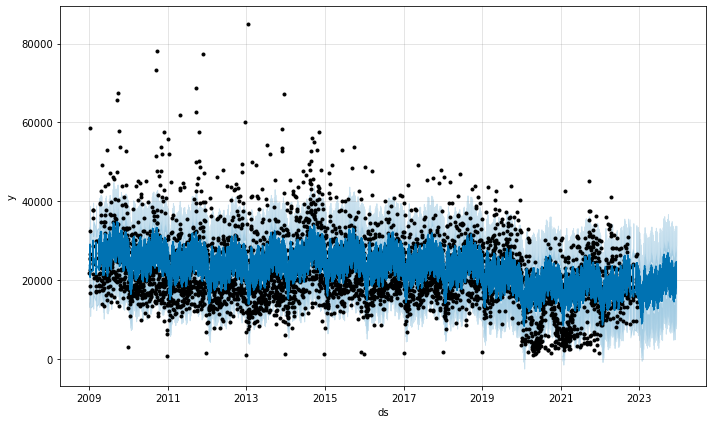

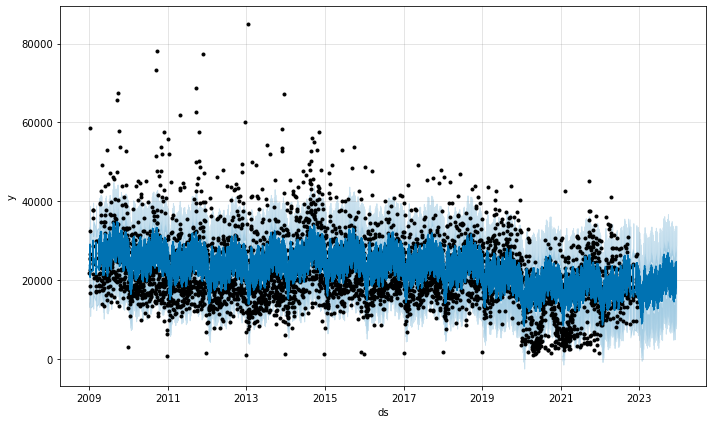

In [44]:
m.plot(forecast)